In [119]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt

m_credits = pd.read_csv("tmdb_5000_credits.csv")
m_metadata = pd.read_csv("tmdb_5000_movies.csv")

In [120]:
print(m_credits["crew"].head())

0    [{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id":...
1    [{"credit_id": "52fe4232c3a36847f800b579", "department": "Camera", "gender": 2, "id": ...
2    [{"credit_id": "54805967c3a36829b5002c41", "department": "Sound", "gender": 2, "id": 1...
3    [{"credit_id": "52fe4781c3a36847f81398c3", "department": "Sound", "gender": 2, "id": 9...
4    [{"credit_id": "52fe479ac3a36847f813eaa3", "department": "Writing", "gender": 2, "id":...
Name: crew, dtype: object


In [121]:
m_metadata.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fa...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film ...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name""...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""A...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


The m_credits contains information of the movie, the main cast and the crew members of the film with other information relative to them.

In order to keep our dataset clean lets rename the variables

In [122]:
m_credits.rename(columns={"movie_id" : "id"}, inplace=True) #Using inplace = True we are modifing the original dataset,not a copy

Our goal now is to have a dataset with as much usefull information as we can so our recomendation system can make use of it to give the best recomendations.

Lets check our datasets if there is information we can use.

In [123]:
print(f"This are the variables of credits:", m_credits.columns)
print(f"This are the variables of metadata:", m_metadata.columns)

This are the variables of credits: Index(['id', 'title', 'cast', 'crew'], dtype='object')
This are the variables of metadata: Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


Both datasets contain the same id for the films. This means we can merge information to have a single dataset with all the information. Lets do it!

In [124]:
df = m_credits.merge(m_metadata, on = 'id',how="inner")
# There were to columns with the name title in both dataset, drop one.
df = df.drop(columns=['title_y'])
# Rename the second one  
df = df.rename(columns={'title_x': 'title'})
df.set_index("id")

,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,overview,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
id,,,,,,,,,,,,,,,,,,,,,
19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""credit_id"": ""5602a8a7c3a3685532001c9a"", ...","[{""credit_id"": ""52fe48009251416c750aca23"", ""department"": ""Editing"", ""gender"": 0, ""id"":...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fa...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""...",en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique...",...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289}, {""name"": ""Twentieth Century Fox Film ...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}, {""iso_3166_1"": ""GB"", ""name""...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,Enter the World of Pandora.,7.2,11800
285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Sparrow"", ""credit_id"": ""52fe4232c3a36847f80...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""department"": ""Camera"", ""gender"": 2, ""id"": ...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""A...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, has come back to life and is headed to the...",...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films"", ""id"": ...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""credit_id"": ""52fe4d22c3a368484e1d8d6b"", ""g...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""department"": ""Sound"", ""gender"": 2, ""id"": 1...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Cr...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name...",en,Spectre,A cryptic message from Bond’s past sends him on a trail to uncover a sinister organiza...,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {""name"": ""B2...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""US"", ""name"": ""United ...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en"", ""name"": ""English""},...",Released,A Plan No One Escapes,6.3,4466
49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Batman"", ""credit_id"": ""52fe4781c3a36847f81...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""department"": ""Sound"", ""gender"": 2, ""id"": 9...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""...",en,The Dark Knight Rises,"Following the death of District Attorney Harvey Dent, Batman assumes responsibility fo...",...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6194}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States of America""}]",2012-07-16,1084939099,165.0,"[{""

All the films have some puntuation but not all of them have the same amount of views. Two films might have the same cateogries but one can be good (a lot of view) and the other might be bad (low amount of reviews). Therefore lets try to make our recomendation system to propose the best film.

To do this we are going to narrow down the movies that we are going to recommend making a new variable that ranks the movies based on average score, their vote_average and the vote_count:

Weighted Rating(WR) = ((v/v+m)*R)+ ((m/v+m)*C)

v = Vote count
m = Minimum votes to be part of the list
R = Average vote rating of the film
C = Average vote rating across all the films

In [125]:
v = df['vote_count']
C = df['vote_average'].mean()
print(f'The average vote rating across all films is:', round(C,2))
R = df['vote_average']

The average vote rating across all films is: 6.09


Lets take the films that are the 90 percentile. This means we are taking the top 10% of films with most amount of vote_counts.

In [126]:
m = round(df['vote_count'].quantile(0.9),2)
print(m)

1838.4


In [127]:
# Filter de dataset to have only films with a minimun amount of view_counts
df = df[df['vote_count'] >= df['vote_count'].quantile(0.9)].copy()

In [128]:
# New weighed rate variable
df['weighted_rate'] = ((v/v+m)*R)+ ((m/v+m)*C)
print(df['weighted_rate'])

0       24444.477335
1       23894.197050
2       22790.575998
3       25180.518136
4       22425.461193
            ...     
4291    24448.656330
4300    25918.077637
4302    26103.834516
4337    25919.466281
4602    26288.317920
Name: weighted_rate, Length: 481, dtype: float64


With this new variable lets sort the films and show the top rated

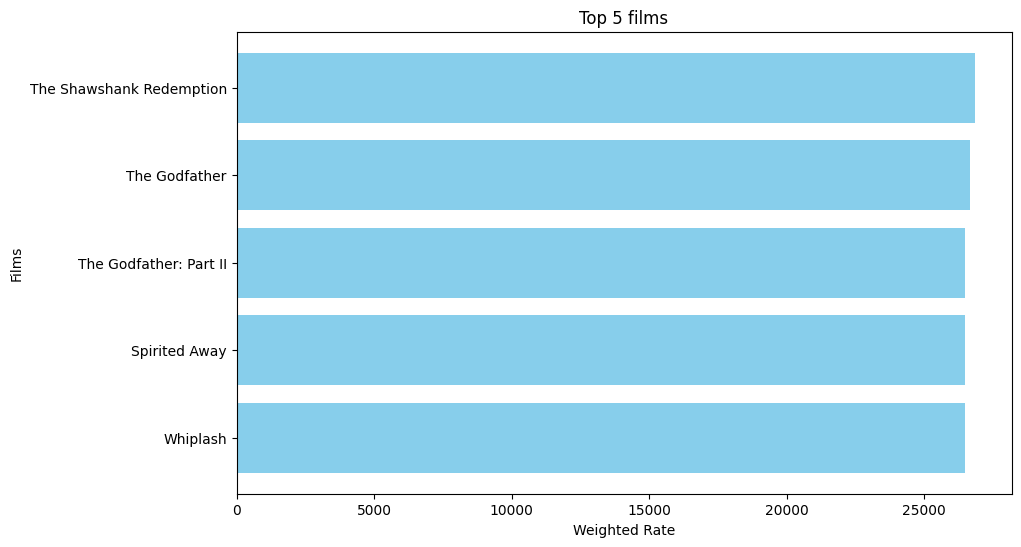

In [129]:
top_movies = df.sort_values('weighted_rate', ascending=False).head(5)
plt.figure(figsize=(10, 6))
plt.barh(top_movies['title'], top_movies['weighted_rate'], color='skyblue')
plt.xlabel('Weighted Rate')
plt.ylabel('Films')
plt.title('Top 5 films')
plt.gca().invert_yaxis()
plt.show()


Nice! Now we have the first movie recommendation system based on a variable that is weighted based on different movie parameters such as the ratings given to them and the number of times they have been seen. However, we can do better. It would be interesting to be able to recommend movies based on their descriptions, so that if you like vampire and werewolf movies you can watch other movies that deal with these topics as well.

To do this we will use the field that describes the movies, and our secret weapon, the TF-idf (Text Frequency - Inverse Document Frequency). 

With this package we can find out which words are most distinctive for each movie and compare the resulting vector with the rest of the movies. We will use cosine similarity to calculate the angle of the word vectors. The closer they are to 1, the more similar the movies will be, and the closer they are to 0, the more different they will be.

In [130]:
# We will use the scikit-learn library to apply TfidfVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.metrics.pairwise import linear_kernel

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
#tfidf = TfidfVectorizer(stop_words = "english")
#tfidf_matrix = tfidf.fit_transform(df1["overview"])

In [ ]:
# Compute the cosine similarity matrix
#cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
#Construct a reverse map of indices and movie titles
#indices = pd.Series( df1.index, index = df1['title_x']).drop_duplicates()